# Proyecto de Consultoría 
## Finanzas 202520
### Universidad de los Andes

Daniel Benavides

Estructurar un portafolio de inversión diversificado con compañías de distintos sectores económicos aplicando conceptos del curso de finanzas corporativas. Sector a analizar **Energía**, subsector **Energía Tradicional**.

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.data_transformers.enable('vegafusion')

from matplotlib import font_manager
plt.rcParams['font.family'] = 'Arial'

DataTransformerRegistry.enable('vegafusion')

## 1. Alcance y Datos

### 1.1 Período y frecuencia de análisis

In [3]:
start = "2015-01-01"
end = "2025-01-01"

El horizonte de 10 años seleccionado permite capturar ciclos completos del sector energético. Este período incluye eventos críticos como el colapso de precios del petróleo en 2015-2016, la recuperación gradual entre 2017-2019, el shock de la pandemia del COVID-19 en 2020, y la volatilidad geopolítica reciente derivada del conflicto en Ucrania durante 2022-2024.

La frecuencia mensual balancea la captura de información relevante mientras evita el ruido de corto plazo presente en datos diarios.

### 1.2 Fuente de datos

In [4]:
from fredapi import Fred
fred = Fred(api_key='a3d8a45391e92cc5c30c9c255819c138')

In [5]:
sofr = pd.DataFrame(fred.get_series('SOFR', observation_start=start, observation_end=end))
sofr  = sofr .dropna()
sofr.index.names = ['Date']
sofr.columns = ["SOFR"]
sofr["SOFR"] = sofr["SOFR"]

Se seleccionó el SOFR como tasa libre de riesgo porque el SOFR se fundamenta en transacciones reales del mercado del Tesoro estadounidense, con un volumen diario de aproximadamente un trillón de dólares. Para efectos de valoración de empresas del sector energético que operan principalmente en Estados Unidos y reportan en dólares, el SOFR representa la tasa apropiada para descontar flujos de caja futuros y calcular el costo de capital.

### 1.3 Selección de compañías

In [6]:
tickers = ["XOM", "CVX", "COP", "EOG", "OXY"]

**ExxonMobil (XOM):** Líder global (~$500B) con operaciones integradas verticalmente desde exploración hasta refinación. Proporciona estabilidad y diversificación de ingresos en todo el ciclo del petróleo.


**Chevron (CVX):** Segundo actor principal (~$280B) con fuerte presencia internacional en gas natural licuado. Competidor directo de ExxonMobil que complementa el análisis del segmento integrado.


**ConocoPhillips (COP):** E&P puro (~$130B) tras separación de operaciones downstream. Ofrece exposición directa a precios de commodities sin el amortiguamiento de la refinación.

**EOG Resources (EOG):** Líder en shale oil estadounidense (~$70B). Representa la revolución del fracking que transformó el mercado energético de la última década.

**Occidental Petroleum (OXY):** E&P diversificado (~$45B) con exposición a químicos y operaciones internacionales. Añade diversificación geográfica en Medio Oriente y América Latina.

## 2. Análisis por Activo

In [7]:
# Obtener datos de recesiones de FRED
recessions = fred.get_series('USREC', observation_start='2015-01-01')
recessions_df = pd.DataFrame(recessions, columns=['recession'])
recessions_df.index.names = ['Date']
recessions_df = recessions_df.reset_index()

recessions_df['recession_start'] = (recessions_df['recession'] == 1) & (recessions_df['recession'].shift(1) == 0)
recessions_df['recession_end'] = (recessions_df['recession'] == 0) & (recessions_df['recession'].shift(1) == 1)

recession_periods = []
start_date = None
for idx, row in recessions_df.iterrows():
    if row['recession_start']:
        start_date = row['Date']
    if row['recession_end'] and start_date is not None:
        recession_periods.append({'start': start_date, 'end': row['Date']})
        start_date = None

if start_date is not None:
    recession_periods.append({'start': start_date, 'end': recessions_df['Date'].iloc[-1]})

recession_bands = pd.DataFrame(recession_periods)

### 2.1 Precio actual, dividendos y dividend yield histórico

#### 2.1.1 Precio actual e indexado

In [8]:
# Precios actuales
df = pd.DataFrame()

for symbol in tickers:
  df[symbol] =  yf.download(symbol, start)["Close"]
df

C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\3462084702.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] =  yf.download(symbol, start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\3462084702.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] =  yf.download(symbol, start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\3462084702.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] =  yf.download(symbol, start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\3462084702.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] =  y

XOM         CVX        COP         EOG        OXY
Date                                                                
2015-01-02   57.916924   70.209557  48.290146   67.469200  58.248158
2015-01-05   56.332195   67.403145  45.991962   63.402340  56.088654
2015-01-06   56.032700   67.371971  44.093121   61.595623  55.612030
2015-01-07   56.600475   67.315857  44.387405   61.207958  55.619251
2015-01-08   57.542564   68.856255  45.494484   63.548607  56.110355
...                ...         ...        ...         ...        ...
2025-11-25  114.510002  148.529999  86.620003  105.470001  41.410000
2025-11-26  114.769997  149.509995  87.089996  106.199997  41.419998
2025-11-28  115.919998  151.130005  88.690002  107.849998  42.000000
2025-12-01  116.629997  152.539993  90.260002  109.709999  42.340000
2025-12-02  115.070000  149.809998  88.750000  108.339996  41.474998

[2746 rows x 5 columns]

In [9]:
df_plot_prices = (
    df.reset_index()
    .melt(id_vars='Date', var_name='Company', value_name='Price')
)
df_plot_prices['Company'] = df_plot_prices['Company'].map({
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'EOG': 'EOG Resources',
    'OXY': 'Occidental Petroleum'
})

In [10]:
color_scale = alt.Scale(
    domain=list(df_plot_prices['Company'].unique()),
    range=['#5B8DBE', '#E8956B', '#D85C5C', "#2FA05E", "#87A7FF"]
)

In [11]:
final_values_prices = (
    df_plot_prices[df_plot_prices['Date'] == df_plot_prices['Date'].max()]
    .assign(label=lambda d: d['Price'].map(lambda x: f"{x:.2f}"))
)

lines_prices = (
    alt.Chart(df_plot_prices).mark_line(strokeWidth=2)
    .encode(
        x=alt.X('Date:T', title='Fecha'),
        y=alt.Y('Price:Q', title='Precio (USD)'),
        color=alt.Color('Company:N', scale=color_scale,
                        title='Compañía',
                        legend=alt.Legend(orient='right', titleFontSize=12, labelFontSize=11)),
    )
    .properties(width=800, height=500,
                title='Precios Históricos - Sector Energía Tradicional')
)

try:
    recessions_df = fred.get_series('USREC', observation_start='2015-01-01')\
        .rename('recession').to_frame().reset_index().rename(columns={'index': 'Date'})
    recessions_df['start'] = (recessions_df['recession']==1)&(recessions_df['recession'].shift(1)==0)
    recessions_df['end']   = (recessions_df['recession']==0)&(recessions_df['recession'].shift(1)==1)

    periods, start = [], None
    for _, r in recessions_df.iterrows():
        if r['start']: start = r['Date']
        if r['end'] and start: periods.append({'start': start, 'end': r['Date']}); start = None
    if start: periods.append({'start': start, 'end': recessions_df['Date'].iloc[-1]})

    chart_prices = (alt.Chart(pd.DataFrame(periods)).mark_rect(opacity=0.2, color='gray')
             .encode(x='start:T', x2='end:T')) + lines_prices if periods else lines_prices
except:
    chart_prices = lines_prices

text_prices = (
    alt.Chart(final_values_prices).mark_text(align='left', dx=5, fontSize=11)
    .encode(
        x='Date:T',
        y='Price:Q',
        text='label:N',
        color=alt.Color('Company:N', scale=color_scale, legend=None),
    )
)

final_chart_prices = (chart_prices + text_prices).configure_axis(labelFontSize=12, titleFontSize=14)

final_chart_prices

alt.LayerChart(...)

In [12]:
# Precios indexados
df_indx = round(df.div(df.iloc[0]).mul(100),3)
df_indx

XOM      CVX      COP      EOG      OXY
Date                                                   
2015-01-02  100.000  100.000  100.000  100.000  100.000
2015-01-05   97.264   96.003   95.241   93.972   96.293
2015-01-06   96.747   95.958   91.309   91.294   95.474
2015-01-07   97.727   95.878   91.918   90.720   95.487
2015-01-08   99.354   98.072   94.211   94.189   96.330
...             ...      ...      ...      ...      ...
2025-11-25  197.714  211.552  179.374  156.323   71.092
2025-11-26  198.163  212.948  180.347  157.405   71.110
2025-11-28  200.149  215.256  183.661  159.851   72.105
2025-12-01  201.375  217.264  186.912  162.608   72.689
2025-12-02  198.681  213.376  183.785  160.577   71.204

[2746 rows x 5 columns]

In [13]:
df_plot = (
    df_indx.reset_index()
    .melt(id_vars='Date', var_name='Company', value_name='Indexed_Price')
)

df_plot['Company'] = df_plot['Company'].map({
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'EOG': 'EOG Resources',
    'OXY': 'Occidental Petroleum'
})

In [14]:
initial = df_plot.groupby('Company')['Indexed_Price'].first()
final_values = (
    df_plot[df_plot['Date'] == df_plot['Date'].max()]
    .assign(Initial=lambda d: d['Company'].map(initial),
            pct_change=lambda d: (d['Indexed_Price'] - d['Initial']) / d['Initial'] * 100,
            label=lambda d: d['pct_change'].map(lambda x: f"{x:.1f}%"))
)

lines = (
    alt.Chart(df_plot).mark_line(strokeWidth=2)
    .encode(
        x=alt.X('Date:T', title='Fecha'),
        y=alt.Y('Indexed_Price:Q', title='Precio Indexado (Base 100)'),
        color=alt.Color('Company:N', scale=color_scale,
                        title='Compañía',
                        legend=alt.Legend(orient='right', titleFontSize=12, labelFontSize=11)),
    )
    .properties(width=800, height=500,
                title='Precios Indexados - Sector Energía Tradicional')
)

try:
    recessions_df = fred.get_series('USREC', observation_start='2015-01-01')\
        .rename('recession').to_frame().reset_index().rename(columns={'index': 'Date'})
    recessions_df['start'] = (recessions_df['recession']==1)&(recessions_df['recession'].shift(1)==0)
    recessions_df['end']   = (recessions_df['recession']==0)&(recessions_df['recession'].shift(1)==1)

    periods, start = [], None
    for _, r in recessions_df.iterrows():
        if r['start']: start = r['Date']
        if r['end'] and start: periods.append({'start': start, 'end': r['Date']}); start = None
    if start: periods.append({'start': start, 'end': recessions_df['Date'].iloc[-1]})

    chart = (alt.Chart(pd.DataFrame(periods)).mark_rect(opacity=0.2, color='gray')
             .encode(x='start:T', x2='end:T')) + lines if periods else lines
except:
    chart = lines

text = (
    alt.Chart(final_values).mark_text(align='left', dx=5, fontSize=11)
    .encode(
        x='Date:T',
        y='Indexed_Price:Q',
        text='label:N',
        color=alt.Color('Company:N', scale=color_scale, legend=None),
    )
)

final_chart = (chart + text).configure_axis(labelFontSize=12, titleFontSize=14)

final_chart

alt.LayerChart(...)

El sector energético tradicional muestra alta volatilidad durante el período 2015-2025, con ConocoPhillips liderando con un retorno de 193.2% seguido por Chevron (143.8%) y Exxon Mobil (115.7%). La caída pronunciada durante marzo-abril de 2020 (recesión COVID-19) evidencia la vulnerabilidad del sector a shocks de demanda globales, con recuperaciones significativas post-2021 impulsadas por la normalización económica y tensiones geopolíticas.

#### 2.1.2 Dividendos

In [15]:
start = "2015-01-01"
end = "2025-01-01"

dividends_dict = {}

for ticker_symbol in tickers:
    ticker = yf.Ticker(ticker_symbol)
    dividendos = round(ticker.dividends,3)
    dividendos = dividendos[start:end]
    dividends_dict[ticker_symbol] = dividendos

df_dividends = pd.DataFrame(dividends_dict)
df_dividends.index.names = ['Date']

df_dividends

XOM   CVX   COP    EOG    OXY
Date                                                     
2015-01-14 00:00:00-05:00   NaN   NaN   NaN  0.168    NaN
2015-02-06 00:00:00-05:00  0.69   NaN   NaN    NaN    NaN
2015-02-12 00:00:00-05:00   NaN  1.07  0.73    NaN    NaN
2015-03-06 00:00:00-05:00   NaN   NaN   NaN    NaN  0.719
2015-04-14 00:00:00-04:00   NaN   NaN   NaN  0.168    NaN
...                         ...   ...   ...    ...    ...
2024-10-17 00:00:00-04:00   NaN   NaN   NaN  0.910    NaN
2024-11-08 00:00:00-05:00   NaN   NaN  0.78    NaN    NaN
2024-11-14 00:00:00-05:00  0.99   NaN   NaN    NaN    NaN
2024-11-18 00:00:00-05:00   NaN  1.63   NaN    NaN    NaN
2024-12-10 00:00:00-05:00   NaN   NaN   NaN    NaN  0.220

[203 rows x 5 columns]

In [16]:
df_div_plot = (
    df_dividends.reset_index()
    .melt(id_vars='Date', var_name='Company', value_name='Dividend')
    .dropna()
)
df_div_plot['Company'] = df_div_plot['Company'].map({
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'EOG': 'EOG Resources',
    'OXY': 'Occidental Petroleum'
})

div_chart = (
    alt.Chart(df_div_plot).mark_circle(size=60)
    .encode(
        x=alt.X('Date:T', title=''),
        y=alt.Y('Dividend:Q', title='Dividendo (USD)', scale=alt.Scale(domain=[0, df_div_plot['Dividend'].max()*1.2])),
        color=alt.Color('Company:N', scale=color_scale,
                        title='Compañía',
                        legend=alt.Legend(orient='right', titleFontSize=12, labelFontSize=11)),
        tooltip=['Date:T', 'Company:N', alt.Tooltip('Dividend:Q', format='$.3f')]
    )
    .properties(width=700, height=400,
                title='Dividendos - Sector Energía Tradicional')
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

div_chart

alt.Chart(...)

Las compañías integradas (Exxon Mobil y Chevron) mantienen políticas de dividendos más consistentes y elevadas, con pagos trimestrales estables incluso durante la crisis de 2020. Las empresas de E&P puro (ConocoPhillips, EOG Resources) muestran mayor variabilidad en dividendos, ajustándose más agresivamente a ciclos de precios del petróleo para preservar liquidez y flexibilidad financiera.

#### 2.1.3 Dividend Yield

In [17]:
yields_dict = {}

for ticker_symbol in tickers:
    ticker = yf.Ticker(ticker_symbol)
    divs = ticker.dividends[start:end]
    precios = ticker.history(period="max")["Close"]
    
    df_temp = pd.concat([divs, precios], axis=1).dropna()
    df_temp.columns = ["Dividendo", "Precio"]
    
    df_temp["Dividend Yield"] = round((df_temp["Dividendo"] * 4) / df_temp["Precio"], 3)
    
    yields_dict[ticker_symbol] = df_temp["Dividend Yield"]

df_yields = pd.DataFrame(yields_dict)
df_yields.index.names = ['Date']

df_yields

XOM    CVX    COP    EOG    OXY
Date                                                        
2015-01-14 00:00:00-05:00    NaN    NaN    NaN  0.010    NaN
2015-02-06 00:00:00-05:00  0.048    NaN    NaN    NaN    NaN
2015-02-12 00:00:00-05:00    NaN  0.061  0.061    NaN    NaN
2015-03-06 00:00:00-05:00    NaN    NaN    NaN    NaN  0.053
2015-04-14 00:00:00-04:00    NaN    NaN    NaN  0.009    NaN
...                          ...    ...    ...    ...    ...
2024-10-17 00:00:00-04:00    NaN    NaN    NaN  0.030    NaN
2024-11-08 00:00:00-05:00    NaN    NaN  0.029    NaN    NaN
2024-11-14 00:00:00-05:00  0.034    NaN    NaN    NaN    NaN
2024-11-18 00:00:00-05:00    NaN  0.042    NaN    NaN    NaN
2024-12-10 00:00:00-05:00    NaN    NaN    NaN    NaN  0.019

[203 rows x 5 columns]

In [18]:
df_yields_plot = (
    df_yields.reset_index()
    .melt(id_vars='Date', var_name='Company', value_name='Dividend_Yield')
    .dropna()
)
df_yields_plot['Company'] = df_yields_plot['Company'].map({
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'EOG': 'EOG Resources',
    'OXY': 'Occidental Petroleum'
})

# Convertir a porcentaje
df_yields_plot['Dividend_Yield'] = df_yields_plot['Dividend_Yield'] * 100

selection = alt.selection_point(fields=['Company'], bind='legend')

yields_chart = (
    alt.Chart(df_yields_plot).mark_circle(size=60)
    .encode(
        x=alt.X('Date:T', title=''),
        y=alt.Y('Dividend_Yield:Q', title='Dividend Yield (%)'),
        color=alt.Color('Company:N', scale=color_scale,
                        title='Compañía',
                        legend=alt.Legend(orient='right', titleFontSize=12, labelFontSize=11)),
        opacity=alt.condition(selection, alt.value(0.8), alt.value(0.2)),
        tooltip=['Date:T', 'Company:N', alt.Tooltip('Dividend_Yield:Q', format='.2f')]
    )
    .add_params(selection)
    .properties(width=700, height=400,
                title='Dividend Yield Histórico - Sector Energía Tradicional')
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

yields_chart

alt.Chart(...)

Los dividend yields fluctúan significativamente con los precios del petróleo, alcanzando picos durante 2020 cuando los precios de las acciones cayeron mientras las empresas intentaban mantener dividendos. Chevron y Exxon Mobil históricamente ofrecen yields más estables (3-6%), mientras que Occidental Petroleum muestra mayor volatilidad reflejando su mayor apalancamiento y sensibilidad a precios de commodities.

Promedio del último dividend yield: 0.0308 (3.08%)


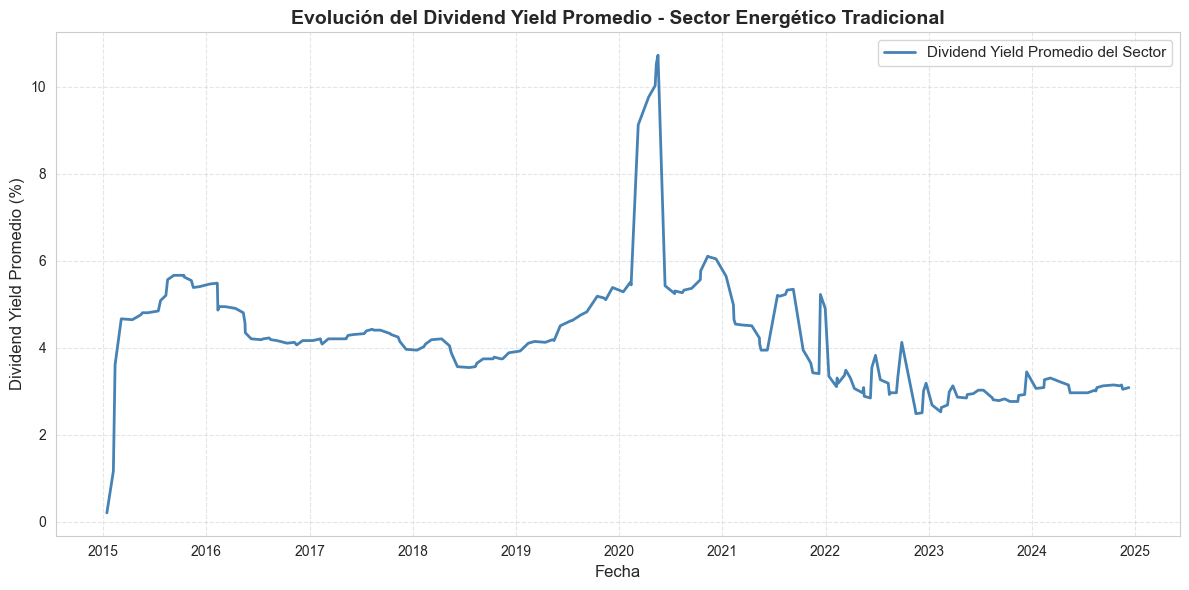

In [43]:
all_yields = [df_yields[col].dropna() for col in df_yields.columns]

# Calcular el último dividend yield de cada empresa
last_yields = []
for ys in all_yields:
    if isinstance(ys, pd.Series) and not ys.empty:
        last_yields.append(ys.iloc[-1])
    else:
        last_yields.append(0)

average_last_yield = np.mean(last_yields)
print(f"Promedio del último dividend yield: {average_last_yield:.4f} ({average_last_yield*100:.2f}%)")

# Convertir todas las series a un DataFrame alineado en fechas
yields_df = pd.concat(all_yields, axis=1)

# Quitar timezone del índice si existe
if yields_df.index.tz is not None:
    yields_df.index = yields_df.index.tz_localize(None)

# Definir fechas de inicio y fin
fecha_inicio = pd.to_datetime(start)
fecha_fin = pd.to_datetime(end)

# Rellenar valores faltantes
yields_df = yields_df.ffill().fillna(0)

# Recortar entre fechas
yields_period = yields_df.loc[fecha_inicio:fecha_fin]

# Promedio diario entre empresas (convertir a porcentaje)
mean_yield_series = yields_period.mean(axis=1) * 100

# Graficar evolución del dividend yield promedio
plt.figure(figsize=(12, 6))
plt.plot(mean_yield_series.index, mean_yield_series.values,
         color="steelblue", linewidth=2, label="Dividend Yield Promedio del Sector")

plt.title("Evolución del Dividend Yield Promedio - Sector Energético Tradicional", 
          fontsize=14, fontweight='bold')
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Dividend Yield Promedio (%)", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

### 2.2 Ratios de valoración y apalancamiento

In [19]:
company_names = {
    'XOM': 'Exxon Mobil',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'EOG': 'EOG Resources',
    'OXY': 'Occidental Petroleum'
}

In [20]:
financial_data = {}

for ticker_symbol in tickers:
    ticker = yf.Ticker(ticker_symbol)
    
    balance_sheet = ticker.balance_sheet
    income_stmt = ticker.income_stmt
    info = ticker.info
    
    financial_data[ticker_symbol] = {
        'balance_sheet': balance_sheet,
        'income_stmt': income_stmt,
        'info': info
    }

ratios_dict = {}

for ticker_symbol in tickers:
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    balance = ticker.balance_sheet
    
    try:
        total_debt = balance.loc['Total Debt'].iloc[0] if 'Total Debt' in balance.index else 0
        total_equity = balance.loc['Stockholders Equity'].iloc[0] if 'Stockholders Equity' in balance.index else 0
        total_assets = balance.loc['Total Assets'].iloc[0] if 'Total Assets' in balance.index else 0
        
        # Ratios de valoración
        pe_ratio = info.get('trailingPE', None)
        pb_ratio = info.get('priceToBook', None)
        ev_ebitda = info.get('enterpriseToEbitda', None)
        
        # Ratios de apalancamiento
        debt_to_equity = total_debt / total_equity if total_equity != 0 else None
        debt_to_value = total_debt / (total_debt + total_equity) if (total_debt + total_equity) != 0 else None
        
        # Ratios de rentabilidad
        roe = info.get('returnOnEquity', None)
        roa = info.get('returnOnAssets', None)
        
        ratios_dict[ticker_symbol] = {
            'P/E Ratio': pe_ratio,
            'P/B Ratio': pb_ratio,
            'EV/EBITDA': ev_ebitda,
            'Debt-to-Equity': debt_to_equity,
            'Debt-to-Value': debt_to_value,
            'ROE': roe,
            'ROA': roa
        }
    except Exception as e:
        print(f"Error procesando {ticker_symbol}: {e}")
        ratios_dict[ticker_symbol] = {}

df_ratios = pd.DataFrame(ratios_dict).T
df_ratios.index.name = 'Ticker'

# Mapear nombres de compañías
df_ratios['Company'] = df_ratios.index.map(company_names)
df_ratios = df_ratios[['Company'] + [col for col in df_ratios.columns if col != 'Company']]

df_ratios

Company  P/E Ratio  P/B Ratio  EV/EBITDA  Debt-to-Equity  \
Ticker                                                                          
XOM              Exxon Mobil  16.735464   1.863529      8.554        0.158169   
CVX                  Chevron  21.064697   1.588499      9.201        0.161117   
COP           ConocoPhillips  12.543785   1.690363      5.065        0.375394   
EOG            EOG Resources  10.764151   1.946295      5.453        0.172635   
OXY     Occidental Petroleum  30.481323   1.459926      5.611        0.793466   

        Debt-to-Value      ROE      ROA  
Ticker                                   
XOM          0.136568  0.11424  0.05108  
CVX          0.138760  0.07316  0.04047  
COP          0.272935  0.15421  0.08098  
EOG          0.147219  0.18477  0.09086  
OXY          0.442420  0.05955  0.03299

In [21]:
df_dtv_plot = df_ratios[['Company', 'Debt-to-Value']].dropna().reset_index()

dtv_chart = (
    alt.Chart(df_dtv_plot).mark_bar()
    .encode(
        x=alt.X('Company:N', title='Compañía', sort='-y'),
        y=alt.Y('Debt-to-Value:Q', title='Debt-to-Value', scale=alt.Scale(domain=[0, 1])),
        color=alt.Color('Company:N', scale=color_scale, legend=None),
        tooltip=['Company:N', alt.Tooltip('Debt-to-Value:Q', format='.2%')]
    )
    .properties(width=600, height=300,
                title='Debt-to-Value - Sector Energía Tradicional')
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

dtv_chart

alt.Chart(...)

Los ratios P/E del sector se mantienen significativamente por debajo del promedio del S&P 500, reflejando percepción de riesgo elevado y preocupaciones sobre la transición energética. Los niveles de Debt-to-Value (20-40%) indican apalancamiento moderado, con empresas integradas manteniendo estructuras de capital más conservadoras que operadores de E&P puro, permitiéndoles mayor resiliencia durante ciclos de precios bajos.

### 2.3 Valuación por dividendos (modelo Gordon & Shapiro)

In [22]:
gordon_shapiro_dict = {}

for ticker_symbol in tickers:
    ticker = yf.Ticker(ticker_symbol)
    
    # Obtener dividendos históricos
    divs = ticker.dividends[start:end]
    
    if len(divs) > 0:
        # Calcular dividendos anuales
        divs_annual = divs.resample('Y').sum()
        
        # Calcular tasa de crecimiento promedio (CAGR)
        if len(divs_annual) > 1:
            years = len(divs_annual) - 1
            g = (divs_annual.iloc[-1] / divs_annual.iloc[0]) ** (1/years) - 1
        else:
            g = 0
        
        # Último dividendo anual
        D0 = divs_annual.iloc[-1] if len(divs_annual) > 0 else 0
        D1 = D0 * (1 + g)  # Dividendo esperado próximo año
        
        # Obtener beta y calcular ke usando CAPM
        info = ticker.info
        beta = info.get('beta', 1.0)
        
        # Tasa libre de riesgo (promedio SOFR reciente)
        rf = sofr['SOFR'].iloc[-1] / 100 if len(sofr) > 0 else 0.045
        
        # Prima de mercado (asumimos ~8% histórico S&P500)
        market_return = 0.10
        rm_rf = market_return - rf
        
        # Costo del capital propio (ke)
        ke = rf + beta * rm_rf
        
        # Precio actual
        current_price = df[ticker_symbol].iloc[-1]
        
        # Valoración Gordon-Shapiro
        if ke > g and g > 0:
            intrinsic_value = D1 / (ke - g)
        else:
            intrinsic_value = None
        
        # Diferencia vs precio de mercado
        if intrinsic_value:
            diff_pct = (intrinsic_value - current_price) / current_price * 100
        else:
            diff_pct = None
        
        gordon_shapiro_dict[ticker_symbol] = {
            'D0 (último año)': D0,
            'g (crecimiento)': g,
            'Beta': beta,
            'ke (costo capital)': ke,
            'Valor Intrínseco': intrinsic_value,
            'Precio Actual': current_price,
            'Diferencia (%)': diff_pct
        }
    else:
        gordon_shapiro_dict[ticker_symbol] = {}

df_gordon = pd.DataFrame(gordon_shapiro_dict).T
df_gordon.index.name = 'Ticker'
df_gordon['Company'] = df_gordon.index.map(company_names)
df_gordon = df_gordon[['Company'] + [col for col in df_gordon.columns if col != 'Company']]

df_gordon

C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\986603364.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  divs_annual = divs.resample('Y').sum()
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\986603364.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  divs_annual = divs.resample('Y').sum()
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\986603364.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  divs_annual = divs.resample('Y').sum()
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\986603364.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  divs_annual = divs.resample('Y').sum()
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\986603364.py:11: FutureWarning: 'Y' is deprecated and will be removed in

Company  D0 (último año)  g (crecimiento)   Beta  \
Ticker                                                                  
XOM              Exxon Mobil             3.84         0.032481  0.378   
CVX                  Chevron             6.52         0.047880  0.669   
COP           ConocoPhillips             3.12         0.006624  0.327   
EOG            EOG Resources             3.64         0.206496  0.505   
OXY     Occidental Petroleum             0.88        -0.126254  0.392   

        ke (costo capital)  Valor Intrínseco  Precio Actual  Diferencia (%)  
Ticker                                                                       
XOM               0.065728        119.251506     115.070000        3.633881  
CVX               0.081762        201.646602     149.809998       34.601566  
COP               0.062918         55.791203      88.750000      -37.136673  
EOG               0.072725               NaN     108.339996             NaN  
OXY               0.066499               NaN      41.474998             NaN

In [23]:
# Visualización: Valor Intrínseco vs Precio Actual
df_valuation_plot = df_gordon[['Company', 'Valor Intrínseco', 'Precio Actual']].dropna().reset_index()
df_valuation_melt = df_valuation_plot.melt(
    id_vars=['Company'], 
    value_vars=['Valor Intrínseco', 'Precio Actual'],
    var_name='Tipo', 
    value_name='Precio'
)

valuation_chart = (
    alt.Chart(df_valuation_melt).mark_bar()
    .encode(
        x=alt.X('Company:N', title='Compañía'),
        y=alt.Y('Precio:Q', title='Precio (USD)'),
        color=alt.Color('Tipo:N', 
                        scale=alt.Scale(domain=['Valor Intrínseco', 'Precio Actual'],
                                       range=['#5B8DBE', '#D85C5C']),
                        legend=alt.Legend(title='Tipo', orient='right')),
        xOffset='Tipo:N',
        tooltip=['Company:N', 'Tipo:N', alt.Tooltip('Precio:Q', format='$.2f')]
    )
    .properties(width=600, height=400,
                title='Valoración Gordon-Shapiro vs Precio de Mercado')
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

valuation_chart

alt.Chart(...)

El modelo Gordon-Shapiro muestra que tres de las cinco compañías están sobrevaloradas respecto a su valor intrínseco basado en dividendos, sugiriendo que el mercado incorpora expectativas de crecimiento o valor de activos no capturados por el modelo.

### 2.4 Beta (apalancada y desapalancada), Alpha e interpretación

In [24]:
# Descargar datos del S&P 500 como proxy del mercado
sp500 = yf.download("^GSPC", start=start, end=end)["Close"]
sp500 = sp500.resample('M').last()  # Mensual

# Calcular retornos mensuales del mercado 
ret_market = sp500.pct_change().dropna()
if isinstance(ret_market, pd.DataFrame):
    ret_market = ret_market.squeeze() 

# Calcular retornos mensuales de las acciones
df_monthly = df.resample('M').last()
ret_stocks = df_monthly.pct_change().dropna()

# Tasa libre de riesgo mensual
sofr_monthly = sofr.resample('M').last()
rf_monthly = sofr_monthly['SOFR'] / 100 / 12

# Calcular Beta, Alpha y métricas para cada compañía
from scipy import stats
capm_results = {}

for ticker_symbol in tickers:
    # Alinear índices primero
    temp_df = pd.DataFrame({
        'Stock': ret_stocks[ticker_symbol],
        'Market': ret_market,
        'RF': rf_monthly
    })
    temp_df = temp_df.dropna()
    
    # Calcular excesos de retorno
    temp_df['Stock_Excess'] = temp_df['Stock'] - temp_df['RF']
    temp_df['Market_Excess'] = temp_df['Market'] - temp_df['RF']
    
    # Regresión lineal: Stock_Excess = Alpha + Beta * Market_Excess
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        temp_df['Market_Excess'], 
        temp_df['Stock_Excess']
    )
    
    beta_levered = slope
    alpha = intercept * 12  # Anualizar alpha (mensual a anual)
    r_squared = r_value ** 2
    
    # Obtener Debt-to-Equity para calcular beta desapalancada
    debt_to_equity = df_ratios.loc[ticker_symbol, 'Debt-to-Equity']
    tax_rate = 0.21  # Tasa impositiva corporativa US (asumida)
    
    # Beta desapalancada: βu = βL / [1 + (1-T) * D/E]
    if debt_to_equity and not pd.isna(debt_to_equity):
        beta_unlevered = beta_levered / (1 + (1 - tax_rate) * debt_to_equity)
    else:
        beta_unlevered = None
    
    # Retorno esperado según CAPM
    rf_annual = temp_df['RF'].mean() * 12
    market_premium = temp_df['Market_Excess'].mean() * 12
    expected_return = rf_annual + beta_levered * market_premium
    
    # Retorno real
    actual_return = temp_df['Stock'].mean() * 12
    
    capm_results[ticker_symbol] = {
        'Beta Apalancada': beta_levered,
        'Beta Desapalancada': beta_unlevered,
        'Alpha (anual)': alpha,
        'R²': r_squared,
        'Retorno Esperado': expected_return,
        'Retorno Real': actual_return,
        'D/E': debt_to_equity
    }

# Crear DataFrame
df_capm = pd.DataFrame(capm_results).T
df_capm.index.name = 'Ticker'
df_capm['Company'] = df_capm.index.map(company_names)
df_capm = df_capm[['Company'] + [col for col in df_capm.columns if col != 'Company']]

df_capm

C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\1414972993.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=start, end=end)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\1414972993.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500 = sp500.resample('M').last()  # Mensual
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\1414972993.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').last()
C:\Users\Daniel Benavides\AppData\Local\Temp\ipykernel_2464\1414972993.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sofr_monthly = sofr.resample('M').last()


Company  Beta Apalancada  Beta Desapalancada  \
Ticker                                                              
XOM              Exxon Mobil         0.967626            0.860147   
CVX                  Chevron         1.079934            0.957998   
COP           ConocoPhillips         1.152460            0.888859   
EOG            EOG Resources         1.392423            1.225313   
OXY     Occidental Petroleum         1.555288            0.956019   

        Alpha (anual)        R²  Retorno Esperado  Retorno Real       D/E  
Ticker                                                                     
XOM          0.019407  0.281646          0.130415      0.149822  0.158169  
CVX         -0.019775  0.372024          0.142753      0.122978  0.161117  
COP          0.034551  0.248225          0.150721      0.185272  0.375394  
EOG         -0.024026  0.311439          0.177083      0.153057  0.172635  
OXY         -0.030146  0.202238          0.194975      0.164829  0.793466

In [25]:
# Comparación Beta Apalancada vs Desapalancada
df_beta_plot = df_capm[['Company', 'Beta Apalancada', 'Beta Desapalancada']].dropna().reset_index()
df_beta_melt = df_beta_plot.melt(
    id_vars=['Company'],
    value_vars=['Beta Apalancada', 'Beta Desapalancada'],
    var_name='Tipo Beta',
    value_name='Beta'
)

beta_chart = (
    alt.Chart(df_beta_melt).mark_bar()
    .encode(
        x=alt.X('Company:N', title='Compañía'),
        y=alt.Y('Beta:Q', title='Beta'),
        color=alt.Color('Tipo Beta:N',
                        scale=alt.Scale(domain=['Beta Apalancada', 'Beta Desapalancada'],
                                       range=['#5B8DBE', '#D85C5C']),
                        legend=alt.Legend(title='Tipo', orient='right')),
        xOffset='Tipo Beta:N',
        tooltip=['Company:N', 'Tipo Beta:N', alt.Tooltip('Beta:Q', format='.3f')]
    )
    .properties(width=600, height=400,
                title='Beta Apalancada vs Desapalancada')
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

beta_chart

alt.Chart(...)

Una beta mayor que 1 indica sensibilidad alta al mercado (petróleo es un sector cíclico). Las compañías con betas más elevadas están más expuestas a fluctuaciones del precio del crudo.

## 3. Retornos y riesgo a nivel Activo

### 3.1 Cálculo de retornos logarítmicos

In [26]:
log_returns = np.log(df / df.shift(1)).dropna()

sp500_log = np.log(sp500 / sp500.shift(1)).dropna()
log_returns['SP500'] = sp500_log

log_returns.head()

XOM       CVX       COP       EOG       OXY  SP500
Date                                                               
2015-01-05 -0.027743 -0.040793 -0.048761 -0.062170 -0.037779    NaN
2015-01-06 -0.005331 -0.000463 -0.042163 -0.028910 -0.008534    NaN
2015-01-07  0.010082 -0.000833  0.006652 -0.006314  0.000130    NaN
2015-01-08  0.016508  0.022625  0.024635  0.037528  0.008791    NaN
2015-01-09 -0.001410 -0.020127 -0.000154  0.006654 -0.001933    NaN

In [27]:
df_log_plot = log_returns.reset_index().melt(
    id_vars='Date',
    var_name='Ticker',
    value_name='Log_Return'
)

company_names_with_sp500 = company_names.copy()
company_names_with_sp500['SP500'] = 'S&P 500'

df_log_plot['Company'] = df_log_plot['Ticker'].map(company_names_with_sp500)

# Colores extendidos
color_scale_extended = alt.Scale(
    domain=['Exxon Mobil', 'Chevron', 'ConocoPhillips', 'EOG Resources', 'Occidental Petroleum', 'S&P 500'],
    range=['#5B8DBE', '#E8956B', '#D85C5C', '#2FA05E', '#A187FF', "#000000"]
)

selection = alt.selection_point(fields=['Company'], bind='legend')

log_returns_chart = (
    alt.Chart(df_log_plot).mark_bar(opacity=0.7, size=1)
    .encode(
        x=alt.X('Date:T', title='Fecha'),
        y=alt.Y('Log_Return:Q', title='Retornos Logarítmicos'),
        color=alt.Color('Company:N', 
                        scale=color_scale_extended,
                        title='Compañía',
                        legend=alt.Legend(orient='right', titleFontSize=12, labelFontSize=11)),
        opacity=alt.condition(selection, alt.value(0.8), alt.value(0.1)),
        tooltip=['Date:T', 'Company:N', alt.Tooltip('Log_Return:Q', format='.4f')]
    )
    .add_params(selection)
    .properties(width=800, height=450,
                title='Retornos Logarítmicos - Sector Energía Tradicional vs S&P 500')
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

log_returns_chart

alt.Chart(...)

### 3.2 Rentabilidad de cada uno de los activos con CAPM

In [28]:
# Retornos simples diarios
ret_simple = df.pct_change().dropna()

# Rentabilidad promedio diaria
ret_daily_mean = ret_simple.mean()

# Rentabilidad promedio anual
ret_annual_mean = ret_daily_mean * 252

# Rentabilidad esperada según CAPM (ya calculada en df_capm)
ret_capm = df_capm.set_index(df_capm.index)['Retorno Esperado']

# Comparación de rentabilidades
df_rentabilidad = pd.DataFrame({
    'Rentabilidad Diaria': ret_daily_mean,
    'Rentabilidad Anual (promedio)': ret_annual_mean,
    'Rentabilidad CAPM': ret_capm
})

df_rentabilidad.index.name = 'Ticker'
df_rentabilidad['Company'] = df_rentabilidad.index.map(company_names)
df_rentabilidad = df_rentabilidad[['Company'] + [col for col in df_rentabilidad.columns if col != 'Company']]

df_rentabilidad_display = df_rentabilidad.copy()
df_rentabilidad_display['Rentabilidad Diaria'] = df_rentabilidad_display['Rentabilidad Diaria'].apply(lambda x: f'{x*100:.2f}%')
df_rentabilidad_display['Rentabilidad Anual (promedio)'] = df_rentabilidad_display['Rentabilidad Anual (promedio)'].apply(lambda x: f'{x*100:.2f}%')
df_rentabilidad_display['Rentabilidad CAPM'] = df_rentabilidad_display['Rentabilidad CAPM'].apply(lambda x: f'{x*100:.2f}%')

df_rentabilidad_display

Company Rentabilidad Diaria  \
Ticker                                             
XOM              Exxon Mobil               0.04%   
CVX                  Chevron               0.04%   
COP           ConocoPhillips               0.05%   
EOG            EOG Resources               0.05%   
OXY     Occidental Petroleum               0.03%   

       Rentabilidad Anual (promedio) Rentabilidad CAPM  
Ticker                                                  
XOM                           10.08%            13.04%  
CVX                           11.26%            14.28%  
COP                           12.84%            15.07%  
EOG                           12.11%            17.71%  
OXY                            8.46%            19.50%

El CAPM sugiere retornos esperados mayores para activos con betas más altas. Esto es coherente: más riesgo sistemático, mayor compensación exigida.

### 3.3 Volatilidad histórica

In [29]:
# Volatilidad diaria (desviación estándar de retornos)
vol_daily = ret_simple.std()

# Volatilidad anual (desviación estándar anualizada)
vol_annual = vol_daily * np.sqrt(252)

# DataFrame de volatilidades
df_volatilidad = pd.DataFrame({
    'Volatilidad Diaria': vol_daily,
    'Volatilidad Anual': vol_annual
})
df_volatilidad.index.name = 'Ticker'
df_volatilidad['Company'] = df_volatilidad.index.map(company_names)
df_volatilidad = df_volatilidad[['Company'] + [col for col in df_volatilidad.columns if col != 'Company']]

# Identificar activo más riesgoso
most_risky = df_volatilidad.loc[df_volatilidad['Volatilidad Anual'].idxmax(), 'Company']
print(f"Activo más riesgoso: {most_risky}")

df_volatilidad

Activo más riesgoso: Occidental Petroleum


Company  Volatilidad Diaria  Volatilidad Anual
Ticker                                                             
XOM              Exxon Mobil            0.017305           0.274701
CVX                  Chevron            0.018405           0.292167
COP           ConocoPhillips            0.023960           0.380359
EOG            EOG Resources            0.024648           0.391276
OXY     Occidental Petroleum            0.029594           0.469789

In [30]:
# Visualización de volatilidad anual
df_vol_plot = df_volatilidad[['Company', 'Volatilidad Anual']].reset_index()

vol_chart = (
    alt.Chart(df_vol_plot).mark_bar()
    .encode(
        x=alt.X('Company:N', title='Compañía', sort='-y'),
        y=alt.Y('Volatilidad Anual:Q', title='Volatilidad Anual', axis=alt.Axis(format='%')),
        color=alt.Color('Company:N', scale=color_scale, legend=None),
        tooltip=['Company:N', alt.Tooltip('Volatilidad Anual:Q', format='.2%')]
    )
    .properties(width=600, height=400,
                title='Volatilidad Anual - Sector Energía Tradicional')
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

vol_chart

alt.Chart(...)

### 3.4 Covarianza y correlación entre activos

In [40]:
# Matriz de covarianzas (diaria)
cov_matrix_daily = ret_simple.cov()

# Matriz de covarianzas (anual)
cov_matrix_annual = cov_matrix_daily * 252

# Matriz de correlaciones
corr_matrix = ret_simple.corr()

# Visualización de matriz de correlación
corr_reset = corr_matrix.reset_index()
id_col = corr_reset.columns[0]
corr_plot_data = corr_reset.melt(id_vars=id_col, var_name='Ticker2', value_name='Correlation')
corr_plot_data.columns = ['Ticker1', 'Ticker2', 'Correlation']

# Mapear nombres
corr_plot_data['Company1'] = corr_plot_data['Ticker1'].map(company_names)
corr_plot_data['Company2'] = corr_plot_data['Ticker2'].map(company_names)

corr_heatmap = (
    alt.Chart(corr_plot_data).mark_rect()
    .encode(
        x=alt.X('Company1:N', title=''),
        y=alt.Y('Company2:N', title=''),
        color=alt.Color('Correlation:Q', title='Correlación'),
        tooltip=['Company1:N', 'Company2:N', alt.Tooltip('Correlation:Q', format='.3f')]
    )
    .properties(width=500, height=500,
                title='Matriz de Correlación - Sector Energía Tradicional')
    .configure_axis(labelFontSize=11, titleFontSize=14)
)

corr_heatmap

alt.Chart(...)

Chevron y Exxon presentan la menor volatilidad relativa, lo que calza con su tamaño, diversificación y estabilidad. Conoco y Occidental son más volátiles por su exposición operacional y estructura financiera.

## 4. Construcción del portafolio

### 4.1 Asignación de pesos y simulación determinístia

In [32]:
ret_mean = ret_simple.mean() * 252  
cov_matrix = ret_simple.cov() * 252 

from itertools import product

# Incrementos de 10% para 5 activos
increments = np.arange(0, 1.1, 0.1)

portfolio_weights = []
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe = []

rf_rate = rf_monthly.mean() * 12

np.random.seed(42)
num_portfolios = 10000

for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights = np.round(weights / np.sum(weights), 2)  

    # Calcular retorno del portafolio
    port_return = np.dot(weights, ret_mean)
    
    # Calcular volatilidad del portafolio
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calcular Sharpe Ratio
    sharpe_ratio = (port_return - rf_rate) / port_volatility
    
    portfolio_weights.append(weights)
    portfolio_returns.append(port_return)
    portfolio_volatilities.append(port_volatility)
    portfolio_sharpe.append(sharpe_ratio)

# Crear DataFrame con resultados
df_portfolios = pd.DataFrame({
    'Retorno': portfolio_returns,
    'Volatilidad': portfolio_volatilities,
    'Sharpe Ratio': portfolio_sharpe
})

# Agregar pesos de cada activo
for i, ticker in enumerate(tickers):
    df_portfolios[f'Peso_{ticker}'] = [w[i] for w in portfolio_weights]

df_portfolios.head(10)

Retorno  Volatilidad  Sharpe Ratio  Peso_XOM  Peso_CVX  Peso_COP  \
0  0.115263     0.315233      0.289154      0.13      0.34      0.26   
1  0.111189     0.367873      0.236702      0.07      0.02      0.36   
2  0.118212     0.325902      0.288736      0.01      0.44      0.38   
3  0.114525     0.341120      0.265045      0.11      0.18      0.30   
4  0.106201     0.328938      0.249556      0.33      0.07      0.16   
5  0.113832     0.312079      0.287490      0.37      0.09      0.24   
6  0.102266     0.350327      0.223087      0.22      0.06      0.02   
7  0.106224     0.319318      0.257148      0.35      0.13      0.04   
8  0.112393     0.337090      0.261890      0.07      0.27      0.02   
9  0.112565     0.316115      0.279812      0.30      0.14      0.23   

   Peso_EOG  Peso_OXY  
0      0.21      0.06  
1      0.25      0.30  
2      0.10      0.08  
3      0.25      0.17  
4      0.20      0.24  
5      0.28      0.02  
6      0.34      0.35  
7      0.29      0.19  
8      0.50      0.14  
9      0.25      0.08

In [33]:
max_sharpe_idx = df_portfolios['Sharpe Ratio'].idxmax()
min_vol_idx = df_portfolios['Volatilidad'].idxmin()

print("Portafolio con Mayor Sharpe Ratio")
print(f"  Retorno: {df_portfolios.loc[max_sharpe_idx, 'Retorno']:.2%}")
print(f"  Volatilidad: {df_portfolios.loc[max_sharpe_idx, 'Volatilidad']:.2%}")
print(f"  Sharpe Ratio: {df_portfolios.loc[max_sharpe_idx, 'Sharpe Ratio']:.3f}")
print("\nPesos:")
for ticker in tickers:
    peso = df_portfolios.loc[max_sharpe_idx, f'Peso_{ticker}']
    print(f"  {company_names[ticker]}: {peso:.2%}")

print("\nPortafolio con Mínima Volatilidad")
print(f"  Retorno: {df_portfolios.loc[min_vol_idx, 'Retorno']:.2%}")
print(f"  Volatilidad: {df_portfolios.loc[min_vol_idx, 'Volatilidad']:.2%}")
print(f"  Sharpe Ratio: {df_portfolios.loc[min_vol_idx, 'Sharpe Ratio']:.3f}")
print("\nPesos:")
for ticker in tickers:
    peso = df_portfolios.loc[min_vol_idx, f'Peso_{ticker}']
    print(f"  {company_names[ticker]}: {peso:.2%}")

Portafolio con Mayor Sharpe Ratio
  Retorno: 11.29%
  Volatilidad: 29.02%
  Sharpe Ratio: 0.306

Pesos:
  Exxon Mobil: 23.00%
  Chevron: 48.00%
  ConocoPhillips: 24.00%
  EOG Resources: 4.00%
  Occidental Petroleum: 0.00%

Portafolio con Mínima Volatilidad
  Retorno: 10.41%
  Volatilidad: 27.19%
  Sharpe Ratio: 0.294

Pesos:
  Exxon Mobil: 65.00%
  Chevron: 26.00%
  ConocoPhillips: 5.00%
  EOG Resources: 1.00%
  Occidental Petroleum: 2.00%


### 4.2 Gráfico riesgo-retorno

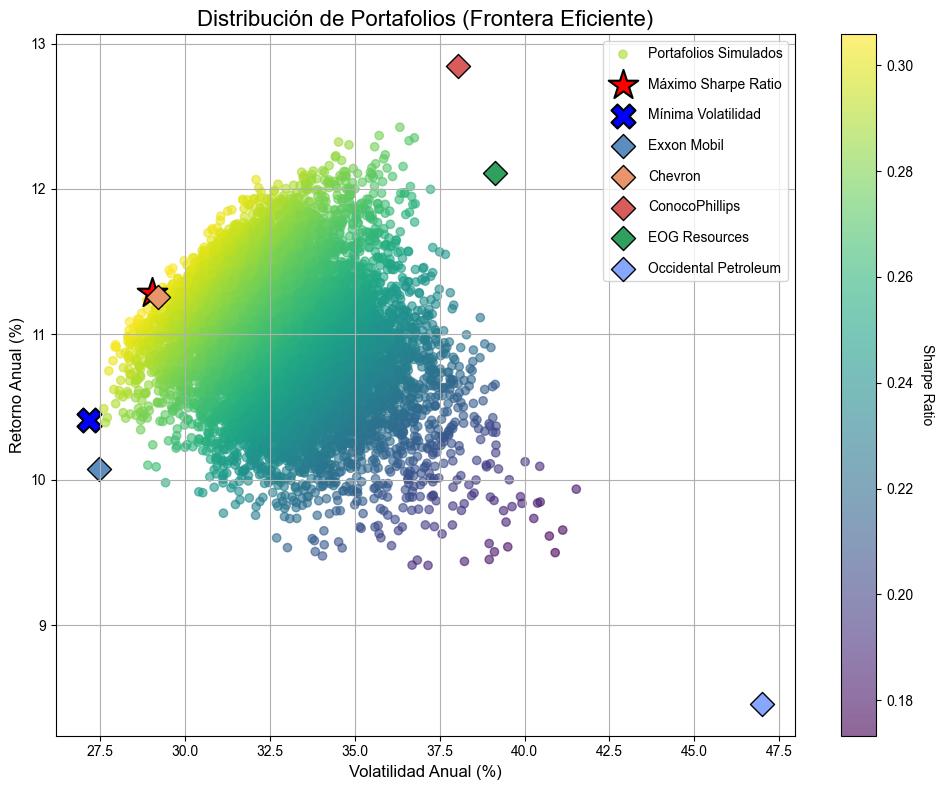

In [34]:
plt.figure(figsize=(10, 8))

# Convertir a porcentajes para el gráfico
df_plot = df_portfolios.copy()
df_plot['Retorno_%'] = df_plot['Retorno'] * 100
df_plot['Volatilidad_%'] = df_plot['Volatilidad'] * 100

# Graficar todos los portafolios
scatter = plt.scatter(
    df_plot['Volatilidad_%'],
    df_plot['Retorno_%'],
    c=df_plot['Sharpe Ratio'],
    cmap='viridis',
    marker='o',
    alpha=0.6,
    label='Portafolios Simulados'
)

# Barra de color para Sharpe Ratio
cbar = plt.colorbar(scatter)
cbar.set_label('Sharpe Ratio', rotation=270, labelpad=15)

# Identificar portafolios óptimos
max_sharpe_idx = df_portfolios['Sharpe Ratio'].idxmax()
min_vol_idx = df_portfolios['Volatilidad'].idxmin()

max_sharpe_portfolio = df_portfolios.loc[max_sharpe_idx]
min_volatility_portfolio = df_portfolios.loc[min_vol_idx]

# Resaltar Máximo Sharpe
plt.scatter(
    max_sharpe_portfolio['Volatilidad'] * 100,
    max_sharpe_portfolio['Retorno'] * 100,
    color='red',
    marker='*',
    s=500,
    label='Máximo Sharpe Ratio',
    edgecolors='black',
    linewidths=1.5
)

# Resaltar Mínima Volatilidad
plt.scatter(
    min_volatility_portfolio['Volatilidad'] * 100,
    min_volatility_portfolio['Retorno'] * 100,
    color='blue',
    marker='X',
    s=300,
    label='Mínima Volatilidad',
    edgecolors='black',
    linewidths=1.5
)

# Agregar activos individuales
for i, ticker in enumerate(tickers):
    ret = ret_mean[ticker] * 100
    vol = np.sqrt(cov_matrix.iloc[i, i]) * 100
    plt.scatter(vol, ret, marker='D', s=150, 
                color=list(color_scale.range)[i],
                label=company_names[ticker],
                edgecolors='black', linewidths=1)

# Etiquetas y título
plt.title('Distribución de Portafolios (Frontera Eficiente)', fontsize=16)
plt.xlabel('Volatilidad Anual (%)', fontsize=12)
plt.ylabel('Retorno Anual (%)', fontsize=12)
plt.legend(labelspacing=1.2, loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Optimización y fronteras eficiente

In [35]:
from scipy.optimize import minimize

### 5.1 Portafolio de mínima varianza

In [36]:
def portfolio_variance(weights, cov_matrix):
    """Calcula la varianza del portafolio"""
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Restricciones y límites
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Los pesos suman 1
bounds = tuple((0, 1) for _ in range(len(tickers)))  # Pesos entre 0 y 1
initial_weights = np.array([1/len(tickers)] * len(tickers))  # Pesos iniciales iguales

# Optimizar para mínima varianza
result_min_var = minimize(
    portfolio_variance,
    initial_weights,
    args=(cov_matrix,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Pesos óptimos
weights_min_var = result_min_var.x

# Métricas del portafolio de mínima varianza
ret_min_var = np.dot(weights_min_var, ret_mean)
vol_min_var = np.sqrt(portfolio_variance(weights_min_var, cov_matrix))
sharpe_min_var = (ret_min_var - rf_rate) / vol_min_var

print("--- PORTAFOLIO DE MÍNIMA VARIANZA ---")
print(f"Retorno Esperado: {ret_min_var*100:.2f}%")
print(f"Volatilidad: {vol_min_var*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_min_var:.4f}\n")
print("Pesos:")
for ticker, weight in zip(tickers, weights_min_var):
    print(f"  {company_names[ticker]}: {weight*100:.2f}%")

print("")

def negative_sharpe(weights, ret_mean, cov_matrix, rf_rate):
    """Calcula el Sharpe Ratio negativo (para minimizar)"""
    port_return = np.dot(weights, ret_mean)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (port_return - rf_rate) / port_volatility
    return -sharpe  # Negativo porque queremos maximizar

# Optimizar para máximo Sharpe Ratio
result_max_sharpe = minimize(
    negative_sharpe,
    initial_weights,
    args=(ret_mean, cov_matrix, rf_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Pesos óptimos
weights_max_sharpe = result_max_sharpe.x

# Métricas del portafolio de máximo Sharpe
ret_max_sharpe = np.dot(weights_max_sharpe, ret_mean)
vol_max_sharpe = np.sqrt(portfolio_variance(weights_max_sharpe, cov_matrix))
sharpe_max_sharpe = (ret_max_sharpe - rf_rate) / vol_max_sharpe

print("--- PORTAFOLIO DE MÁXIMO SHARPE RATIO ---")
print(f"Retorno Esperado: {ret_max_sharpe*100:.2f}%")
print(f"Volatilidad: {vol_max_sharpe*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_max_sharpe:.4f}\n")
print("Pesos:")
for ticker, weight in zip(tickers, weights_max_sharpe):
    print(f"  {company_names[ticker]}: {weight*100:.2f}%")

--- PORTAFOLIO DE MÍNIMA VARIANZA ---
Retorno Esperado: 10.45%
Volatilidad: 26.98%
Sharpe Ratio: 0.2979

Pesos:
  Exxon Mobil: 68.47%
  Chevron: 31.53%
  ConocoPhillips: 0.00%
  EOG Resources: 0.00%
  Occidental Petroleum: 0.00%

--- PORTAFOLIO DE MÁXIMO SHARPE RATIO ---
Retorno Esperado: 11.23%
Volatilidad: 28.63%
Sharpe Ratio: 0.3082

Pesos:
  Exxon Mobil: 21.64%
  Chevron: 63.61%
  ConocoPhillips: 14.75%
  EOG Resources: 0.00%
  Occidental Petroleum: 0.00%


El portafolio de mínima varianza pone casi todo el peso en Exxon (68.44%) y Chevron (31.56%). Es coherente: ambas son las menos volátiles y con correlaciones favorables. Las otras empresas quedan excluidas por aumentar el riesgo sin mejorar retorno esperado.

### 5.2 Frontera eficiente

In [37]:
target_returns = np.linspace(ret_mean.min(), ret_mean.max(), 100)
frontier_volatilities = []

for target_ret in target_returns:
    # Restricciones: pesos suman 1 y retorno = target_ret
    constraints_frontier = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, ret_mean) - target_ret}
    ]
    
    # Minimizar varianza para cada retorno objetivo
    result = minimize(
        portfolio_variance,
        initial_weights,
        args=(cov_matrix,),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints_frontier
    )
    
    if result.success:
        frontier_volatilities.append(np.sqrt(result.fun))
    else:
        frontier_volatilities.append(np.nan)

# Crear DataFrame de la frontera
df_frontier = pd.DataFrame({
    'Retorno': target_returns,
    'Volatilidad': frontier_volatilities
}).dropna()

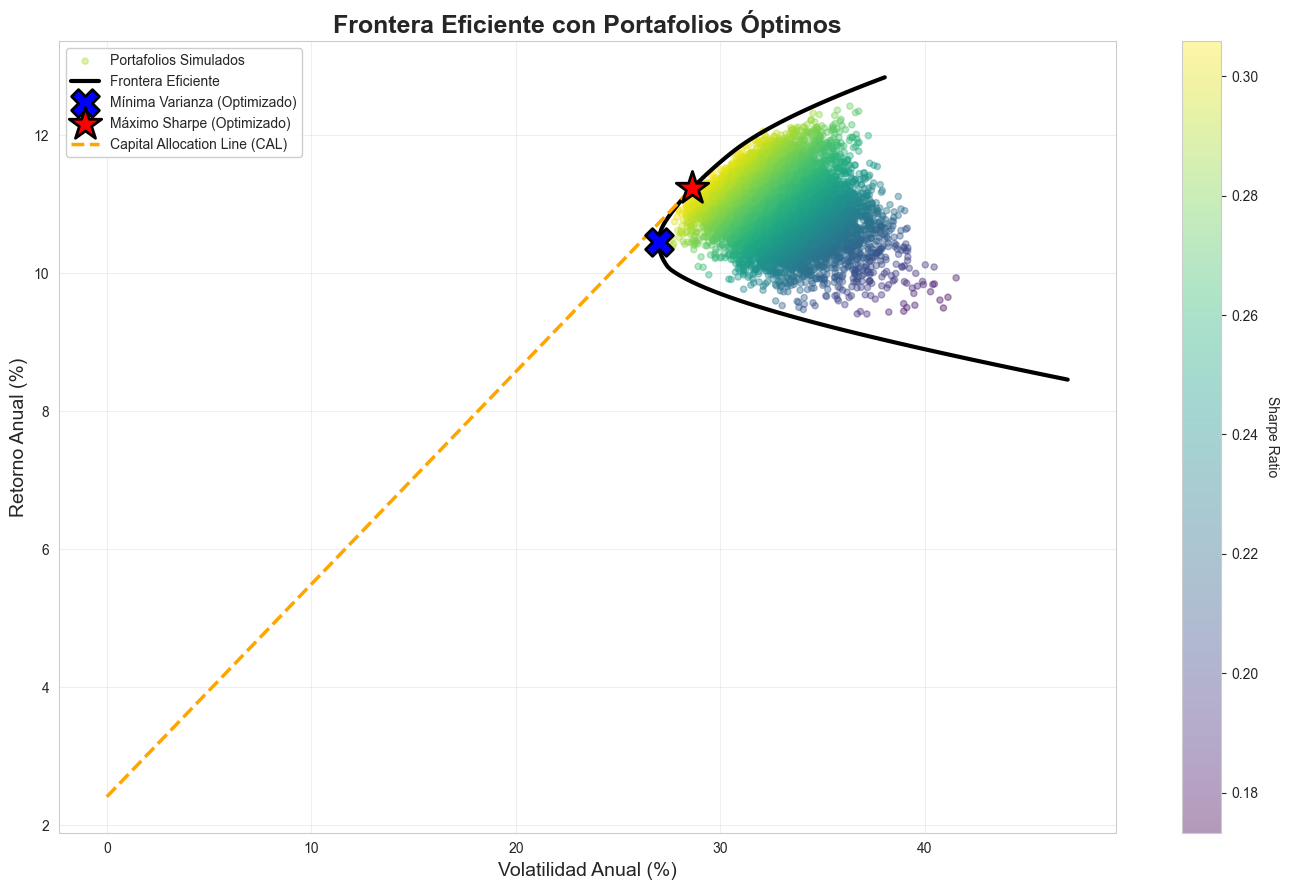

In [ ]:
plt.figure(figsize=(14, 9))
sns.set_style("whitegrid")

# 1. Portafolios simulados (fondo)
scatter = plt.scatter(
    df_portfolios['Volatilidad'] * 100,
    df_portfolios['Retorno'] * 100,
    c=df_portfolios['Sharpe Ratio'],
    cmap='viridis',
    marker='o',
    alpha=0.4,
    s=20,
    label='Portafolios Simulados'
)
cbar = plt.colorbar(scatter)
cbar.set_label('Sharpe Ratio', rotation=270, labelpad=15)

# 2. Frontera eficiente (curva analítica)
plt.plot(
    df_frontier['Volatilidad'] * 100,
    df_frontier['Retorno'] * 100,
    color='black',
    linewidth=3,
    label='Frontera Eficiente',
    linestyle='-'
)

# 4. Portafolio de Mínima Varianza
plt.scatter(
    vol_min_var * 100,
    ret_min_var * 100,
    color='blue',
    marker='X',
    s=400,
    label='Mínima Varianza',
    edgecolors='black',
    linewidths=2,
    zorder=10
)

# 5. Portafolio de Máximo Sharpe
plt.scatter(
    vol_max_sharpe * 100,
    ret_max_sharpe * 100,
    color='red',
    marker='*',
    s=600,
    label='Máximo Sharpe',
    edgecolors='black',
    linewidths=2,
    zorder=10
)

# 6. Capital Allocation Line (CAL)
# Línea desde rf hasta portafolio de máximo Sharpe
rf_rate_annual = rf_rate
cal_x = np.array([0, vol_max_sharpe * 100])
cal_y = np.array([rf_rate_annual * 100, ret_max_sharpe * 100])
plt.plot(cal_x, cal_y, color='orange', linewidth=2.5, linestyle='--', 
         label='Capital Allocation Line (CAL)', zorder=8)

# Etiquetas y formato
plt.title('Frontera Eficiente con Portafolios Óptimos', fontsize=18, fontweight='bold')
plt.xlabel('Volatilidad Anual (%)', fontsize=14)
plt.ylabel('Retorno Anual (%)', fontsize=14)
plt.legend(loc='upper left', fontsize=10, framealpha=0.95)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
portfolios_optimos = pd.DataFrame({
    'Mínima Varianza': [ret_min_var*100, vol_min_var*100, sharpe_min_var] + list(weights_min_var*100),
    'Máximo Sharpe': [ret_max_sharpe*100, vol_max_sharpe*100, sharpe_max_sharpe] + list(weights_max_sharpe*100)
}, index=['Retorno (%)', 'Volatilidad (%)', 'Sharpe Ratio'] + [company_names[t] for t in tickers])

print(portfolios_optimos.to_string(float_format='%.4f'))

                      Mínima Varianza  Máximo Sharpe
Retorno (%)                   10.4488        11.2347
Volatilidad (%)               26.9804        28.6250
Sharpe Ratio                   0.2979         0.3082
Exxon Mobil                   68.4653        21.6378
Chevron                       31.5347        63.6148
ConocoPhillips                 0.0000        14.7473
EOG Resources                  0.0000         0.0000
Occidental Petroleum           0.0000         0.0000


Para maximizar el Sharpe, la solución desplaza más peso hacia Chevron (64.73%), reduce Exxon y añade algo de Conoco (14.16%), que ofrece mayor retorno esperado aunque con más riesgo. EOG y Occidental siguen fuera porque no aportan eficiencia marginal.